# SHAP (SHapley Additive exPlanations) values

#### pip install shap

## Regression

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestRegressor().fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6786994703506961


#### California housing dataset. 

This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

In [2]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [3]:
y

array([1.369  , 2.413  , 2.007  , 0.725  , 4.6    , 1.2    , 2.47   ,
       3.369  , 3.397  , 2.656  , 2.379  , 0.922  , 0.795  , 1.375  ,
       2.201  , 2.761  , 3.953  , 3.     , 1.827  , 3.864  , 1.314  ,
       0.742  , 2.31   , 3.941  , 1.761  , 1.734  , 2.021  , 1.708  ,
       0.926  , 0.57   , 4.657  , 3.726  , 4.     , 1.539  , 1.     ,
       1.587  , 1.421  , 1.396  , 3.197  , 1.313  , 1.107  , 0.849  ,
       0.704  , 2.76   , 1.58   , 0.542  , 1.232  , 1.162  , 1.592  ,
       2.155  , 2.781  , 0.66   , 2.929  , 1.712  , 2.75   , 0.962  ,
       5.00001, 1.676  , 1.829  , 2.231  , 1.733  , 1.891  , 1.177  ,
       2.468  , 0.618  , 0.934  , 0.557  , 3.905  , 2.03   , 0.889  ,
       5.00001, 1.703  , 1.55   , 0.579  , 5.00001, 1.083  , 3.506  ,
       2.032  , 2.214  , 1.553  , 2.706  , 2.     , 0.875  , 2.045  ,
       1.969  , 1.839  , 0.786  , 1.458  , 0.767  , 0.985  , 2.217  ,
       1.713  , 0.618  , 2.747  , 0.75   , 2.042  , 3.75   , 2.408  ,
       1.391  , 3.90

In [4]:
import numpy as np

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

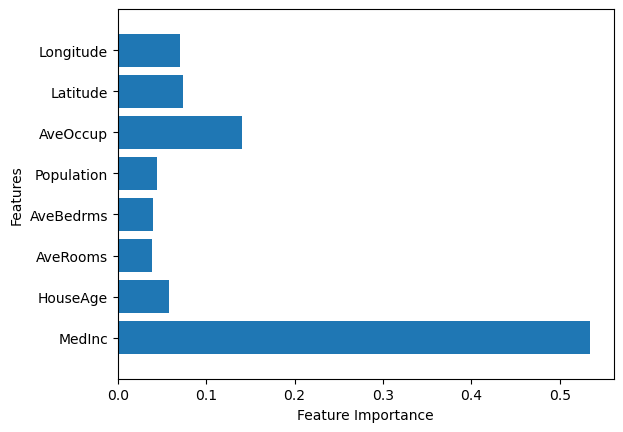

In [5]:
plot_feature_importances(model, X_train.shape[1], X_train.columns)

### explainer

In [7]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

In [8]:
X_test.shape

(250, 8)

In [9]:
shap_values.shape

(250, 8)

In [10]:
shap_values

array([[-0.13651825, -0.08226789, -0.04932913, ..., -0.06073567,
        -0.3628652 ,  0.07400385],
       [ 0.26049492, -0.01511209,  0.04792927, ...,  0.1887147 ,
         0.04734422,  0.18934536],
       [ 0.04246465,  0.02957678, -0.01559461, ..., -0.28754165,
         0.10133278, -0.1692927 ],
       ...,
       [ 0.12430827,  0.03855638, -0.01603052, ..., -0.17926224,
        -0.41900154,  0.11760852],
       [ 0.51245886,  0.1329673 , -0.01850565, ...,  0.04666307,
         0.13294772, -0.09589476],
       [-0.40038816, -0.00942995, -0.06049063, ..., -0.17501091,
         0.23908358, -0.06504701]])

### summary plot

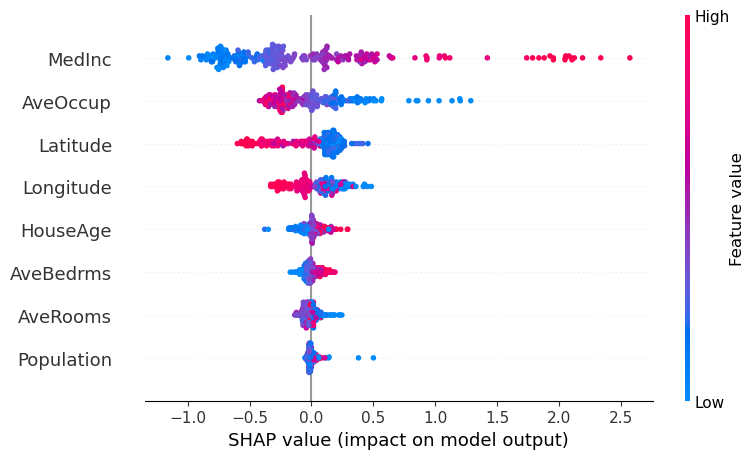

In [11]:
shap.summary_plot(shap_values, X_test)

### force_plot

In [12]:
shap.initjs() # if you see an error, excute this line

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:]) #about data point 0 

In [13]:
explainer.expected_value

array([2.05156677])

In [14]:
np.mean(y_test)

2.02595252

In [15]:
model.predict(X_test)[0]

1.4729502000000003

In [16]:
model.predict(X_test)

array([1.4729502, 2.7880802, 1.7228   , 0.79808  , 0.70643  , 4.5403563,
       2.2252   , 1.17066  , 1.52304  , 1.3393   , 0.92439  , 1.42869  ,
       1.67164  , 1.51068  , 1.89849  , 1.57282  , 3.4237515, 2.57763  ,
       1.94683  , 1.58648  , 2.9608101, 1.7297801, 1.83432  , 1.54629  ,
       0.85344  , 1.00006  , 1.09733  , 2.4453104, 1.60245  , 2.8939303,
       0.95701  , 1.7969905, 1.47314  , 1.6656   , 0.92099  , 1.29249  ,
       1.4214   , 3.3340503, 3.4514201, 0.93605  , 2.54795  , 1.07228  ,
       1.57819  , 0.85971  , 1.71993  , 1.7685202, 0.90895  , 1.94086  ,
       3.960854 , 1.7839405, 1.68009  , 2.25117  , 1.7087502, 3.3333804,
       2.0403203, 3.8639922, 1.229    , 3.7271405, 1.86345  , 2.9152202,
       1.20443  , 1.15971  , 1.72077  , 2.8182205, 3.9257504, 1.8910601,
       1.17705  , 1.14175  , 2.36613  , 1.57057  , 2.9785102, 1.53636  ,
       0.9483   , 1.11639  , 2.6305102, 1.71921  , 1.09884  , 1.92474  ,
       3.907662 , 1.46577  , 2.2717302, 1.8037301, 

In [17]:
pd.DataFrame(X_test.iloc[0,:])

,12953
MedInc,3.781300
HouseAge,15.000000
AveRooms,5.620058
AveBedrms,1.013500
Population,2868.000000
AveOccup,2.765670
Latitude,38.700000
Longitude,-121.280000


In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:]) #about data point 1

In [19]:
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:]) #about data point 2

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test) 

In [21]:
print(min(X_test['MedInc']), max(X_test['MedInc']))

0.9722 15.0001


### depndence plot

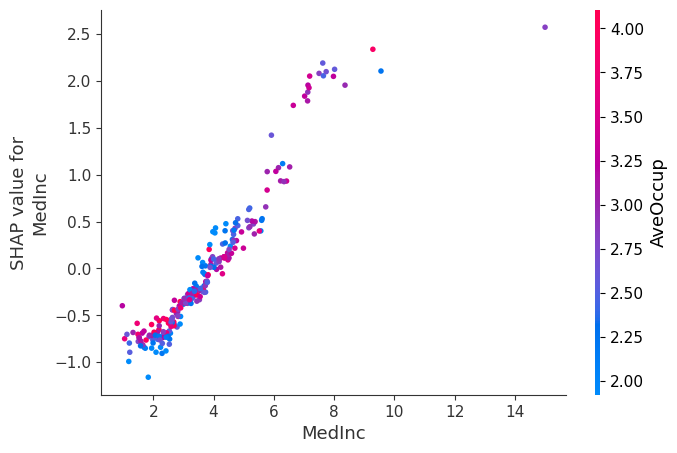

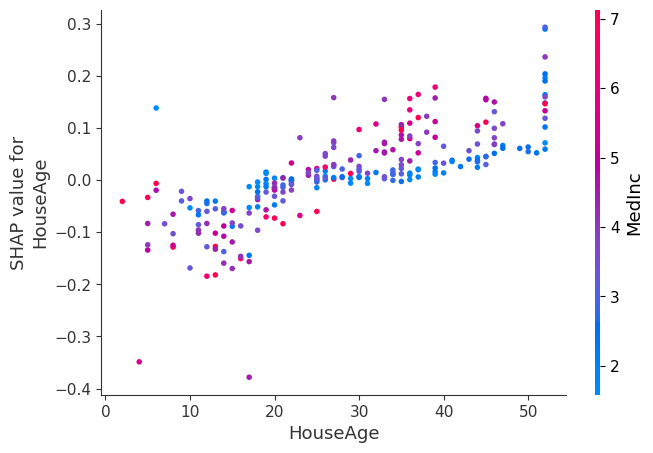

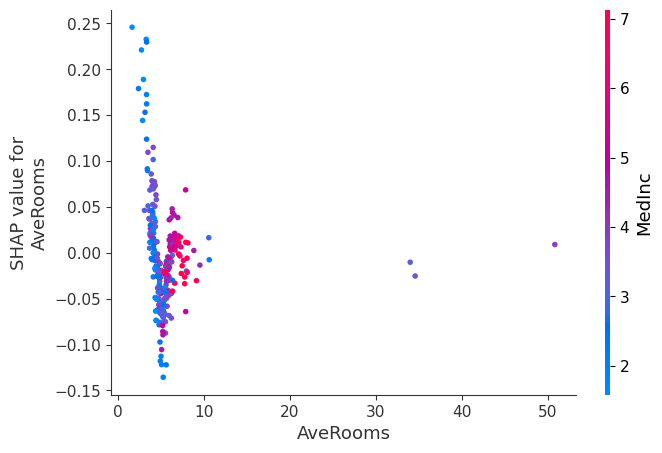

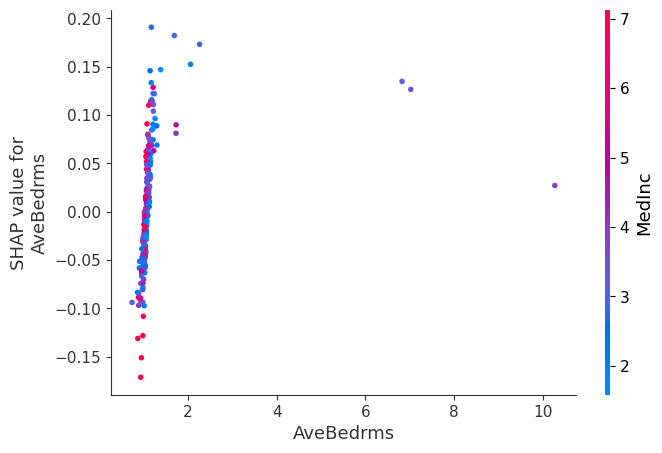

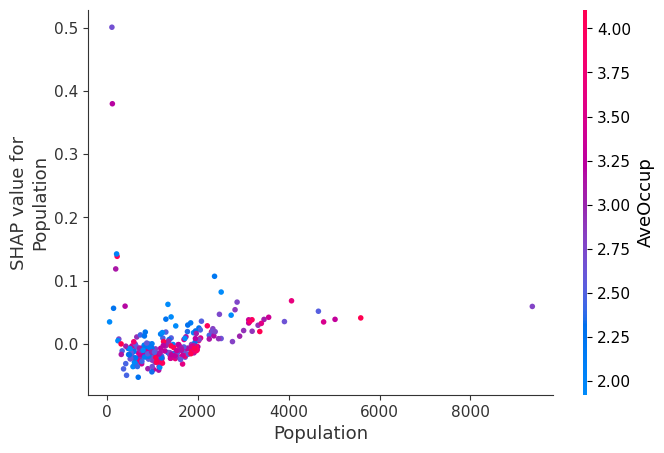

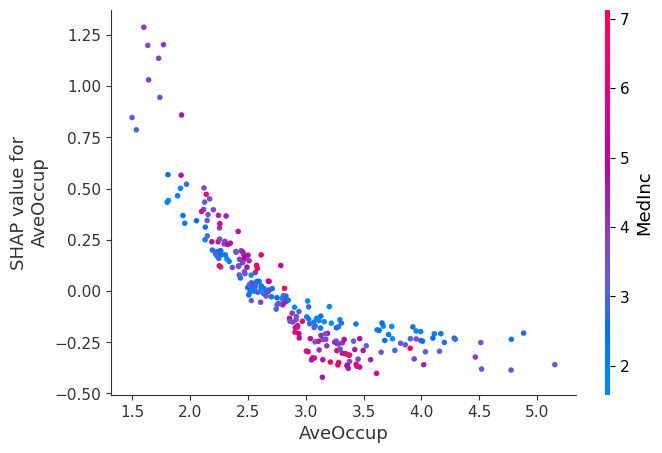

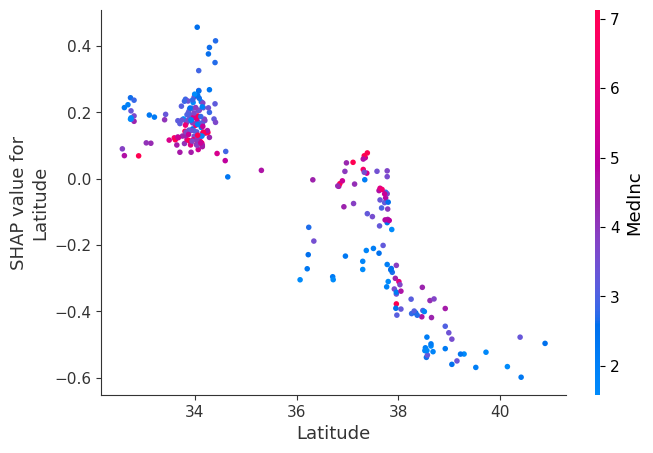

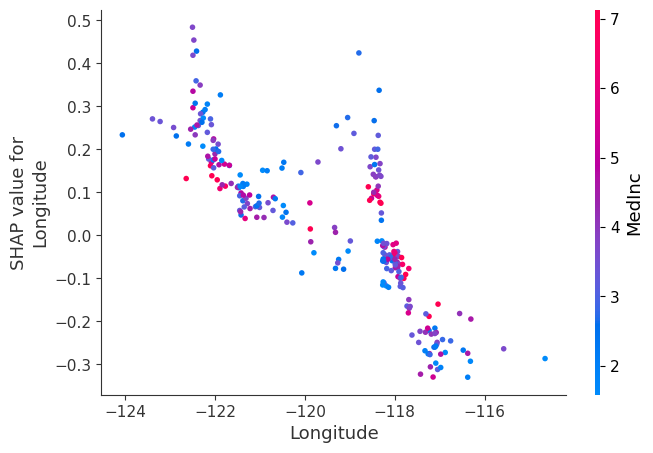

In [22]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values, X_test, feature_names = X_test.columns)

In [23]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

## Classfication

In [26]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_excel("9_Crowdfunding_ex.xlsx")

X = df[['Backers', 'CountryCode', 'VideoCount', 'ImageCount', 'Goal', 'Period', 'Total_Updates']]

In [27]:
df['Success']

0      2
1      2
2      2
3      2
4      1
      ..
762    2
763    2
764    1
765    2
766    2
Name: Success, Length: 767, dtype: int64

In [28]:
def target_class_change(value):
    if value == 2:
        new_value = 0
    else:
        new_value = 1
    return new_value

In [29]:
df['Success_target'] = df['Success'].apply(target_class_change)
y = df['Success_target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train

,Backers,CountryCode,VideoCount,ImageCount,Goal,Period,Total_Updates
762,77,10,0,30,35000.0,44,1
127,213,1,1,21,25000.0,44,1
564,0,2,0,0,100.0,60,1
375,0,1,0,0,300.0,30,0
663,362,1,0,9,25000.0,32,5
...,...,...,...,...,...,...,...
707,6,1,0,0,500.0,30,2
192,12,1,0,1,2500.0,29,0
629,34,1,0,0,97000.0,40,1
559,165,1,1,6,50000.0,29,2


In [32]:
X_train.shape

(575, 7)

Accuracy on training set: 1.000
Accuracy on test set: 0.880


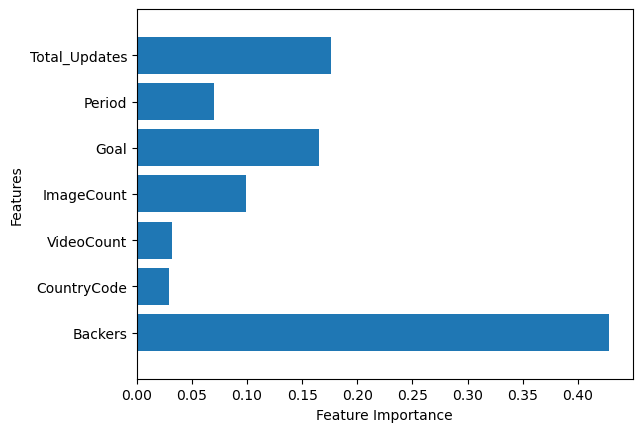

In [33]:
tree =RandomForestClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

plot_feature_importances(tree, X_test.shape[1], X_test.columns)

In [34]:
explainer = shap.Explainer(tree)
shap_values = explainer.shap_values(X_test)

In [35]:
X_test.shape

(192, 7)

In [36]:
shap_values.shape

AttributeError: 'list' object has no attribute 'shape'

In [37]:
shap_values

[array([[ 3.47759802e-02, -1.23397856e-02,  4.13696013e-03, ...,
         -6.49327399e-02, -1.14063049e-02,  4.36618616e-02],
        [ 2.47175048e-01,  7.03831596e-03,  9.67627391e-03, ...,
         -6.70858459e-02, -3.90545109e-03,  2.61255816e-02],
        [-4.48608908e-01, -1.09110453e-02, -2.12257021e-04, ...,
          1.27350518e-02, -1.94945070e-02, -1.35178935e-01],
        ...,
        [ 1.50919674e-01,  2.36070147e-04,  6.73744118e-03, ...,
          7.39116210e-02,  1.76295015e-02,  1.97620575e-02],
        [ 1.51575693e-01,  1.21455906e-02,  6.14691086e-03, ...,
          3.85098786e-02,  1.83719203e-03,  5.46445886e-02],
        [ 2.37185660e-01, -1.34784237e-02,  1.14352840e-02, ...,
         -6.66354577e-02, -3.14163756e-03,  6.36844661e-02]]),
 array([[-3.47759802e-02,  1.23397856e-02, -4.13696013e-03, ...,
          6.49327399e-02,  1.14063049e-02, -4.36618616e-02],
        [-2.47175048e-01, -7.03831596e-03, -9.67627391e-03, ...,
          6.70858459e-02,  3.90545109e

In [38]:
shap_values[0].shape

(192, 7)

In [39]:
shap_values[0]

array([[ 3.47759802e-02, -1.23397856e-02,  4.13696013e-03, ...,
        -6.49327399e-02, -1.14063049e-02,  4.36618616e-02],
       [ 2.47175048e-01,  7.03831596e-03,  9.67627391e-03, ...,
        -6.70858459e-02, -3.90545109e-03,  2.61255816e-02],
       [-4.48608908e-01, -1.09110453e-02, -2.12257021e-04, ...,
         1.27350518e-02, -1.94945070e-02, -1.35178935e-01],
       ...,
       [ 1.50919674e-01,  2.36070147e-04,  6.73744118e-03, ...,
         7.39116210e-02,  1.76295015e-02,  1.97620575e-02],
       [ 1.51575693e-01,  1.21455906e-02,  6.14691086e-03, ...,
         3.85098786e-02,  1.83719203e-03,  5.46445886e-02],
       [ 2.37185660e-01, -1.34784237e-02,  1.14352840e-02, ...,
        -6.66354577e-02, -3.14163756e-03,  6.36844661e-02]])

In [40]:
shap_values[1]

array([[-3.47759802e-02,  1.23397856e-02, -4.13696013e-03, ...,
         6.49327399e-02,  1.14063049e-02, -4.36618616e-02],
       [-2.47175048e-01, -7.03831596e-03, -9.67627391e-03, ...,
         6.70858459e-02,  3.90545109e-03, -2.61255816e-02],
       [ 4.48608908e-01,  1.09110453e-02,  2.12257021e-04, ...,
        -1.27350518e-02,  1.94945070e-02,  1.35178935e-01],
       ...,
       [-1.50919674e-01, -2.36070147e-04, -6.73744118e-03, ...,
        -7.39116210e-02, -1.76295015e-02, -1.97620575e-02],
       [-1.51575693e-01, -1.21455906e-02, -6.14691086e-03, ...,
        -3.85098786e-02, -1.83719203e-03, -5.46445886e-02],
       [-2.37185660e-01,  1.34784237e-02, -1.14352840e-02, ...,
         6.66354577e-02,  3.14163756e-03, -6.36844661e-02]])

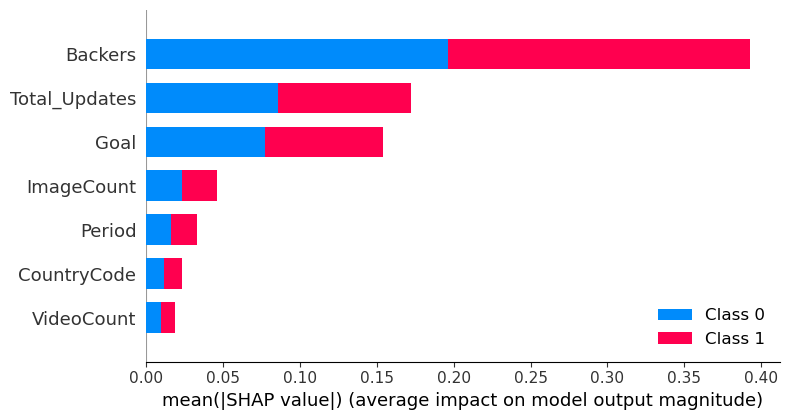

In [41]:
shap.summary_plot(shap_values, X_test, feature_names = X_test.columns)

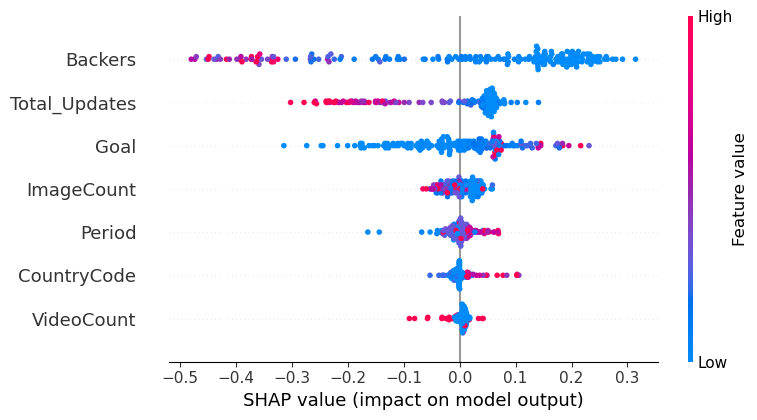

In [42]:
shap.summary_plot(shap_values[0], X_test, feature_names = X_test.columns)

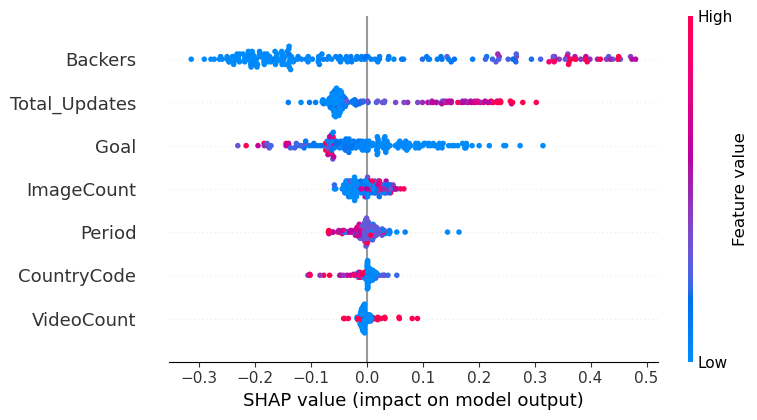

In [43]:
shap.summary_plot(shap_values[1], X_test, feature_names = X_test.columns)

In [44]:
explainer.expected_value

array([0.71208696, 0.28791304])

In [48]:
tree.predict_proba(X_test)

array([[0.72, 0.28],
       [0.96, 0.04],
       [0.09, 0.91],
       [0.82, 0.18],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.56, 0.44],
       [0.33, 0.67],
       [0.95, 0.05],
       [0.83, 0.17],
       [0.99, 0.01],
       [0.2 , 0.8 ],
       [0.98, 0.02],
       [0.78, 0.22],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.34, 0.66],
       [0.95, 0.05],
       [0.67, 0.33],
       [0.8 , 0.2 ],
       [0.03, 0.97],
       [0.96, 0.04],
       [0.65, 0.35],
       [0.96, 0.04],
       [0.14, 0.86],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.85, 0.15],
       [0.74, 0.26],
       [0.99, 0.01],
       [0.43, 0.57],
       [0.53, 0.47],
       [0.72, 0.28],
       [0.85, 0.15],
       [1.  , 0.  ],
       [0.53, 0.47],
       [1.  , 0.  ],
       [0.28, 0.72],
       [1.  , 0.  ],
       [0.21, 0.79],
       [0.31, 0.69],
       [0.97, 0.03],
       [0.19, 0.81],
       [0.96,

In [60]:
np.mean(tree.predict_proba(X_test)[:, 0])

0.7062500000000002

In [61]:
np.mean(tree.predict_proba(X_test)[:, 1])

0.29375

In [49]:
tree.predict(X_test)[0]

0

In [50]:
tree.predict_proba(X_test)[0]

array([0.72, 0.28])

In [72]:
pd.DataFrame(X_test.iloc[1,:])

,122
Backers,0.0
CountryCode,1.0
VideoCount,0.0
ImageCount,0.0
Goal,1000.0
Period,30.0
Total_Updates,1.0


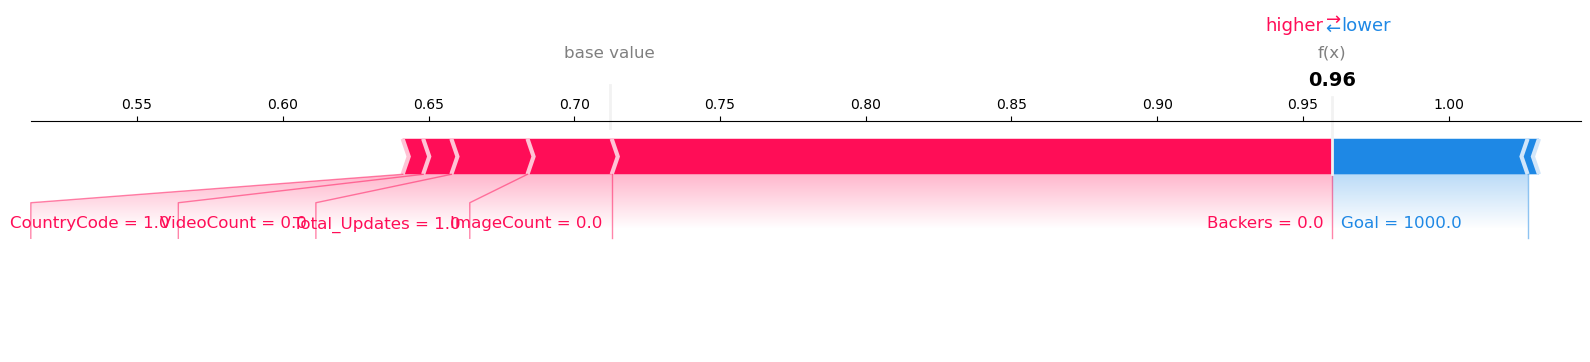

In [68]:
shap.plots.force(explainer.expected_value[0], shap_values[0][1,:], X_test.iloc[1, :], matplotlib = True)

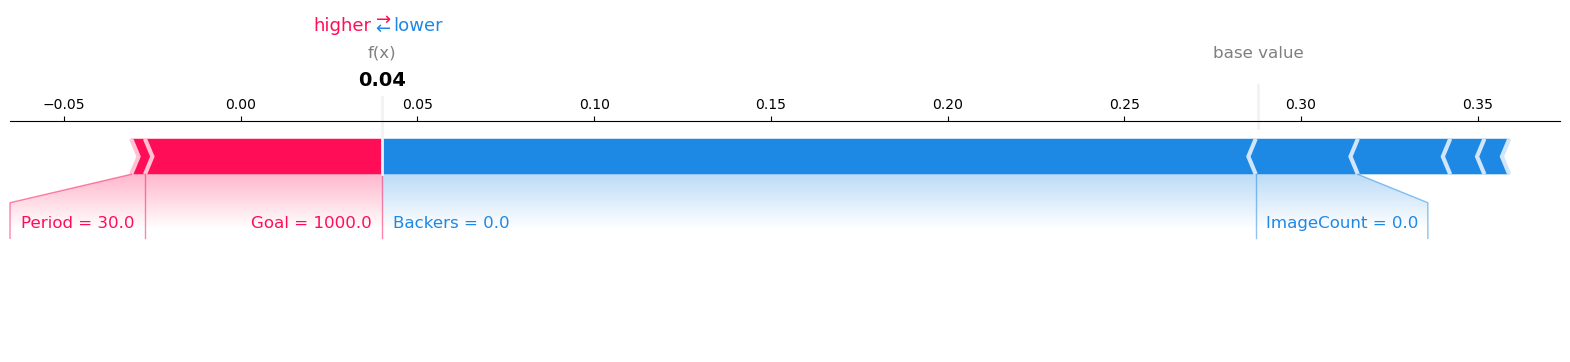

In [69]:
shap.plots.force(explainer.expected_value[1], shap_values[1][1,:], X_test.iloc[1, :], matplotlib = True)

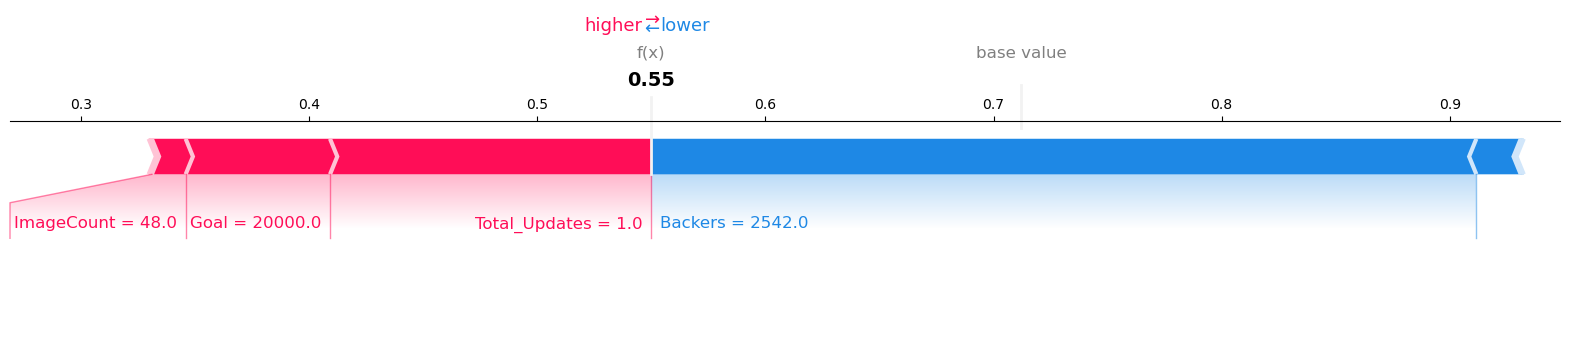

In [70]:
shap.force_plot(explainer.expected_value[0], shap_values[0][50,:], X_test.iloc[50, :], matplotlib = True)

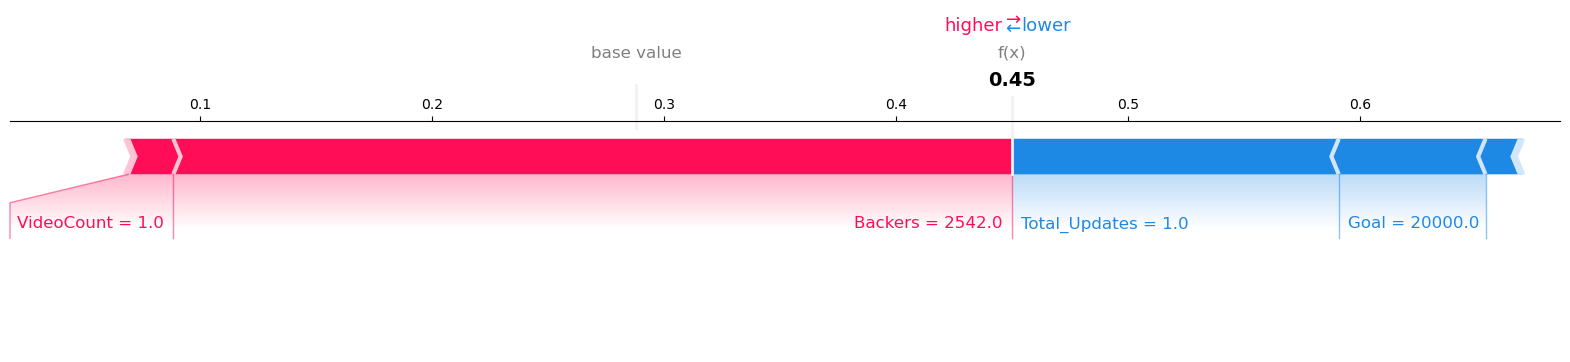

In [71]:
shap.plots.force(explainer.expected_value[1], shap_values[1][50,:], X_test.iloc[50, :], matplotlib = True)

In [74]:
pd.DataFrame(X_test.iloc[50,:])

,578
Backers,2542.0
CountryCode,2.0
VideoCount,1.0
ImageCount,48.0
Goal,20000.0
Period,30.0
Total_Updates,1.0


In [53]:
shap.initjs()

shap.plots.force(explainer.expected_value[0], shap_values[0], X_test)

In [54]:
shap.plots.force(explainer.expected_value[1], shap_values[1], X_test)

### dependence plot

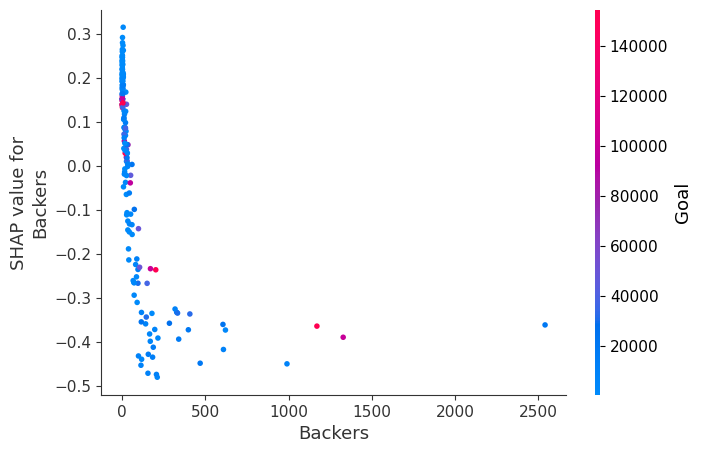

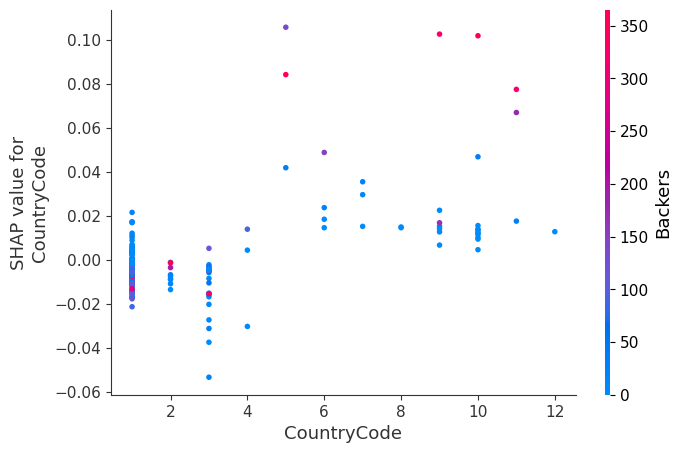

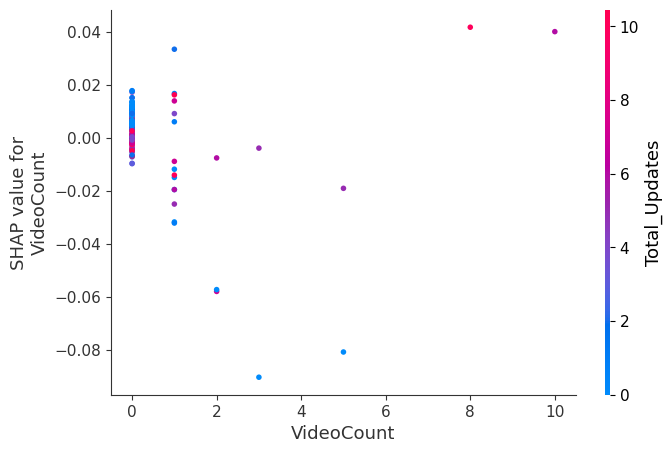

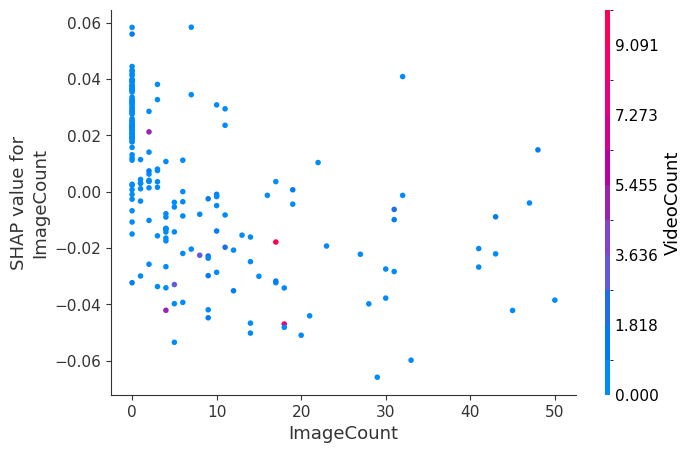

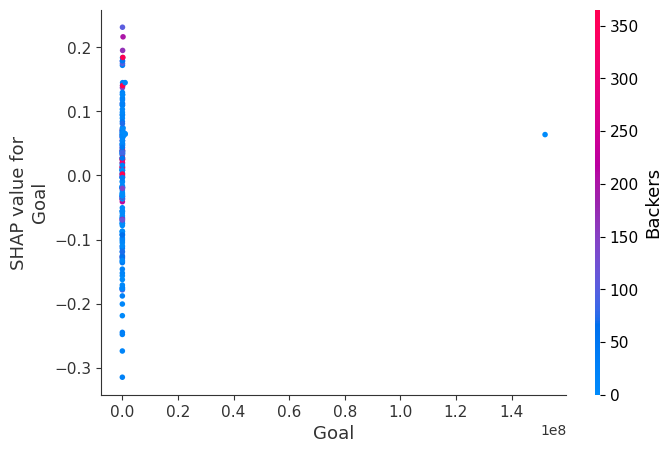

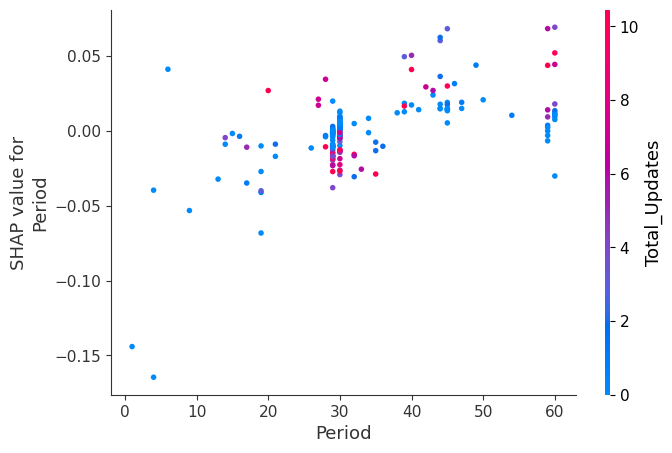

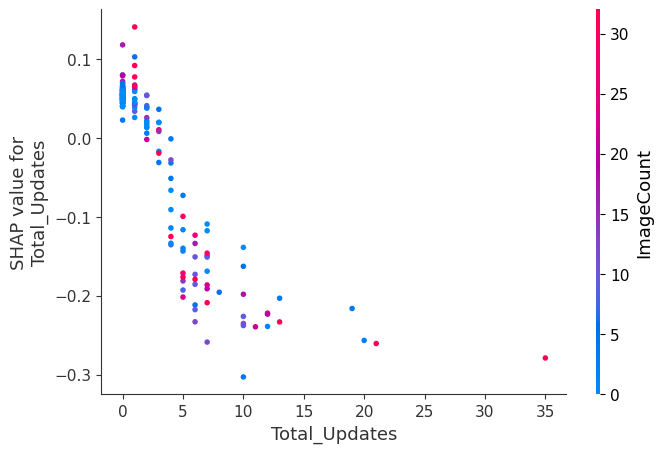

In [55]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values[0], X_test, feature_names = X_test.columns)

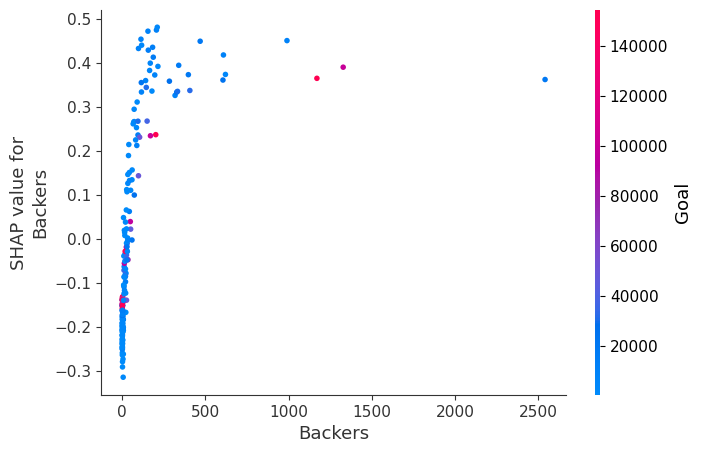

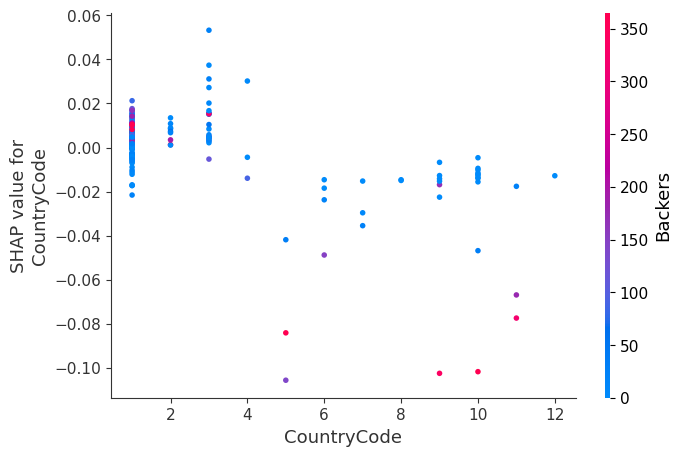

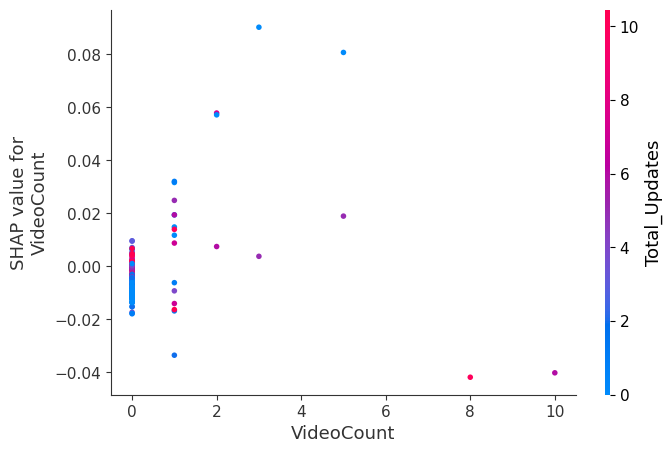

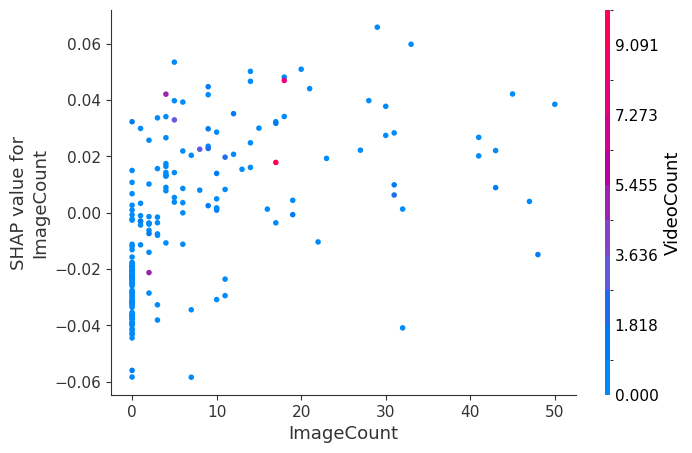

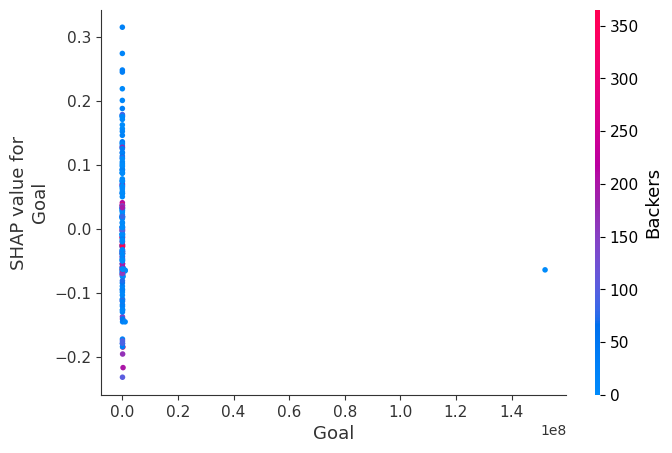

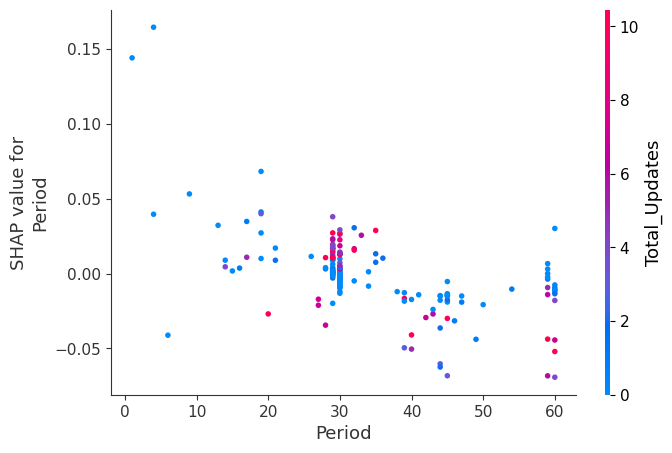

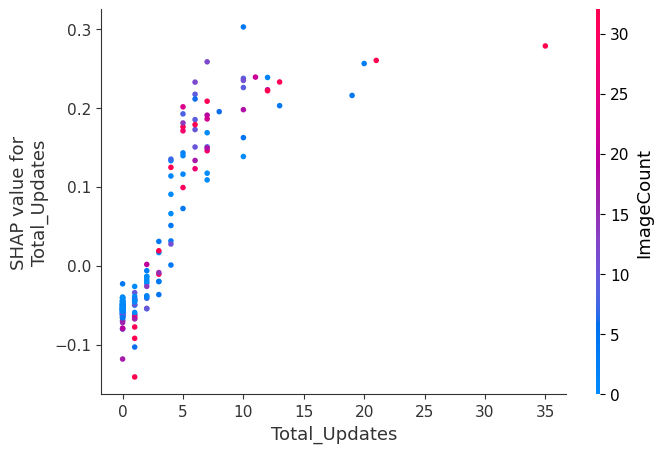

In [56]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values[1], X_test, feature_names = X_test.columns)